# Simple Neural Network Logic Gates Implementation

This notebook demonstrates how single-layer neural networks (perceptrons) can replicate basic logic gates (AND, OR, NOT) without hidden layers.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## AND Gate Implementation

**Structure**: 2 inputs → 1 output (NO hidden layer)
- **Neurons**: 1 output neuron
- **Activation**: Sigmoid 
- **Theory**: For AND gate, both inputs must be 1 to produce output 1
- **Initial weights**: [0.5, 0.5] - equal contribution from both inputs
- **Initial bias**: -0.7 - ensures output is 0 unless both inputs are high

In [13]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_and = np.array([[0], [0], [0], [1]], dtype=np.float32)

and_model = keras.Sequential([
    layers.Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True)
])

and_model.layers[0].set_weights([np.array([[0.5], [0.5]]), np.array([-0.7])])

and_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

initial_predictions = and_model.predict(X_and, verbose=0)
initial_binary = (initial_predictions > 0.5).astype(int)

print("Initial AND Gate Results (before training):")
np.column_stack((X_and, y_and, initial_binary))

Initial AND Gate Results (before training):


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 1., 1.]])

## OR Gate Implementation

**Structure**: 2 inputs → 1 output (NO hidden layer)
- **Neurons**: 1 output neuron
- **Activation**: Sigmoid
- **Theory**: For OR gate, at least one input must be 1 to produce output 1
- **Initial weights**: [0.6, 0.6] - strong contribution from either input
- **Initial bias**: -0.3 - lower threshold, easier to activate

In [14]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_or = np.array([[0], [1], [1], [1]], dtype=np.float32)

or_model = keras.Sequential([
    layers.Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True)
])

or_model.layers[0].set_weights([np.array([[0.6], [0.6]]), np.array([-0.3])])

or_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

initial_or_predictions = or_model.predict(X_or, verbose=0)
initial_or_binary = (initial_or_predictions > 0.5).astype(int)

print("Initial OR Gate Results (before training):")
np.column_stack((X_or, y_or, initial_or_binary))

Initial OR Gate Results (before training):


array([[0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 1., 1.]])

## NOT Gate Implementation

**Structure**: 1 input → 1 output (NO hidden layer)
- **Neurons**: 1 output neuron
- **Activation**: Sigmoid
- **Theory**: NOT gate inverts the input (0→1, 1→0)
- **Initial weight**: [-1.0] - negative weight inverts the signal
- **Initial bias**: [0.5] - shifts the decision boundary

In [15]:
X_not = np.array([[0], [1]], dtype=np.float32)
y_not = np.array([[1], [0]], dtype=np.float32)

not_model = keras.Sequential([
    layers.Dense(1, input_shape=(1,), activation='sigmoid', use_bias=True)
])

not_model.layers[0].set_weights([np.array([[-1.0]]), np.array([0.5])])

not_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

initial_not_predictions = not_model.predict(X_not, verbose=0)
initial_not_binary = (initial_not_predictions > 0.5).astype(int)

print("Initial NOT Gate Results (before training):")
np.column_stack((X_not, y_not, initial_not_binary))

Initial NOT Gate Results (before training):


array([[0., 1., 1.],
       [1., 0., 0.]])

## Training Process for AND Gate

**Training Process Explanation:**
1. **Forward Pass**: Calculate output using current weights and bias
2. **Loss Calculation**: Compare predicted output with expected output
3. **Backpropagation**: Calculate gradients of weights and bias
4. **Weight Update**: Adjust weights and bias using gradient descent
5. **Repeat**: Continue until convergence

In [16]:
and_model_train = keras.Sequential([
    layers.Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True)
])

and_model_train.compile(optimizer=keras.optimizers.Adam(learning_rate=1.0), 
                       loss='binary_crossentropy', metrics=['accuracy'])

history_and = and_model_train.fit(X_and, y_and, epochs=100, verbose=0)

trained_and_predictions = and_model_train.predict(X_and, verbose=0)
trained_and_binary = (trained_and_predictions > 0.5).astype(int)

print("Trained AND Gate Results:")
result_and = np.column_stack((X_and, y_and, trained_and_binary))
result_and

Trained AND Gate Results:


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 1., 1.]])

In [17]:
or_model_train = keras.Sequential([
    layers.Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True)
])

or_model_train.compile(optimizer=keras.optimizers.Adam(learning_rate=1.0), 
                      loss='binary_crossentropy', metrics=['accuracy'])

history_or = or_model_train.fit(X_or, y_or, epochs=100, verbose=0)

trained_or_predictions = or_model_train.predict(X_or, verbose=0)
trained_or_binary = (trained_or_predictions > 0.5).astype(int)

print("Trained OR Gate Results:")
result_or = np.column_stack((X_or, y_or, trained_or_binary))
result_or

Trained OR Gate Results:


array([[0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 1., 1.]])

## Final Learned Weights and Biases

Examining how the network learned the correct parameters through training

In [22]:
and_final_weights = and_model_train.get_weights()
print(f"AND Gate - Final Weights: {and_final_weights[0].flatten()}")
print(f"AND Gate - Final Bias: {and_final_weights[1]}")

AND Gate - Final Weights: [11.647586 11.765534]
AND Gate - Final Bias: [-17.642065]


In [23]:
or_final_weights = or_model_train.get_weights()
print(f"OR Gate - Final Weights: {or_final_weights[0].flatten()}")
print(f"OR Gate - Final Bias: {or_final_weights[1]}")

OR Gate - Final Weights: [12.92142  13.033553]
OR Gate - Final Bias: [-5.9499717]


In [24]:
not_model_train = keras.Sequential([
    layers.Dense(1, input_shape=(1,), activation='sigmoid', use_bias=True)
])

not_model_train.compile(optimizer=keras.optimizers.Adam(learning_rate=1.0), 
                       loss='binary_crossentropy', metrics=['accuracy'])

history_not = not_model_train.fit(X_not, y_not, epochs=100, verbose=0)

not_final_weights = not_model_train.get_weights()
print(f"NOT Gate - Final Weight: {not_final_weights[0].flatten()}")
print(f"NOT Gate - Final Bias: {not_final_weights[1]}")

NOT Gate - Final Weight: [-13.968018]
NOT Gate - Final Bias: [6.7320857]


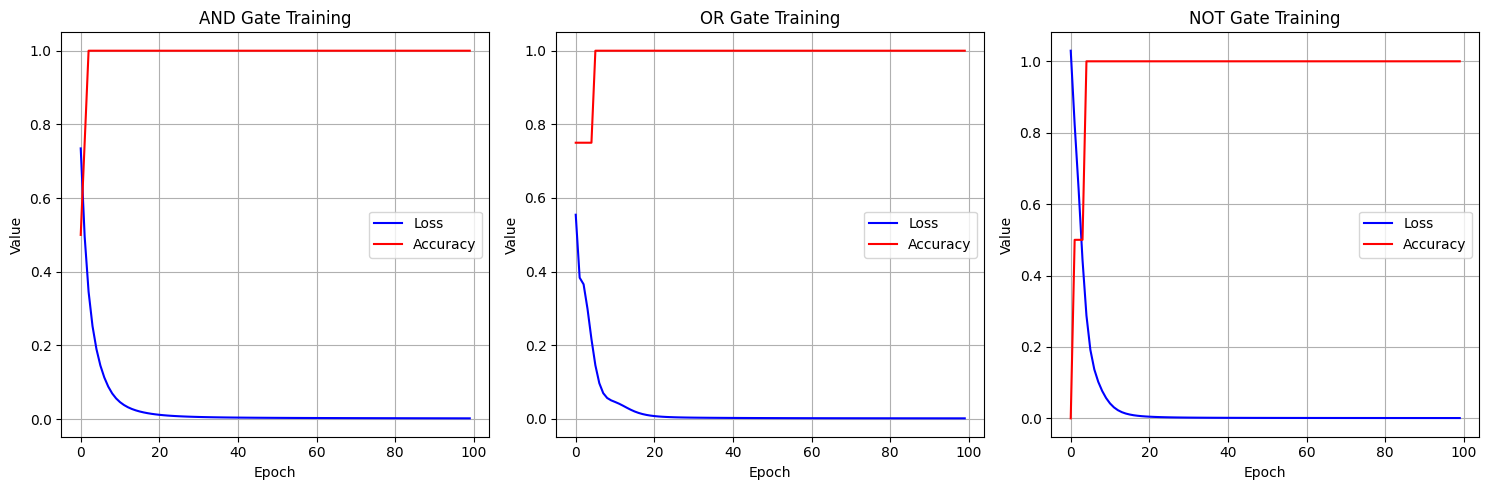

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_and.history['loss'], 'b-', label='Loss')
plt.plot(history_and.history['accuracy'], 'r-', label='Accuracy')
plt.title('AND Gate Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history_or.history['loss'], 'b-', label='Loss')
plt.plot(history_or.history['accuracy'], 'r-', label='Accuracy')
plt.title('OR Gate Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(history_not.history['loss'], 'b-', label='Loss')
plt.plot(history_not.history['accuracy'], 'r-', label='Accuracy')
plt.title('NOT Gate Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()